In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
def euclidean_distance(a, b):
    # Store the number of dimensions
    dim = len(a)

    # Set initial distance to 0
    distance = 0

    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(float(a[d]) - float(b[d])) ** 2

    distance = distance ** (1 / 2)

    return distance

In [ ]:
col_names = ['Local Price', 'Bathrooms', 'Land Area', 'Living area','Garages','Rooms','Bedrooms','Age','Construction type']

In [ ]:
df = pd.read_csv("Assignment4_Data.csv", header=None, names=col_names)
df.head()
df = df.iloc[1: , :]


X = df.drop('Construction type', axis=1)
y = df['Construction type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

def knn_predict(X_train, X_test, y_train, y_test, k):
    # Counter to help with label voting
    from collections import Counter

    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)

        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'],
                                index=y_train.index)

        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]

        # Append prediction to output list
        y_hat_test.append(prediction)

    return y_hat_test

In [ ]:
scores={}
score_list=[]
krange=int(input("Enter VALUE of k"))
krange=range(1,krange)
for k in krange: 
  y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=k)
  scores[k]=accuracy_score(y_test, y_hat_test)
  score_list.append(accuracy_score(y_test, y_hat_test))

Enter VALUE of k5


Text(0, 0.5, 'Testing Accuracy')

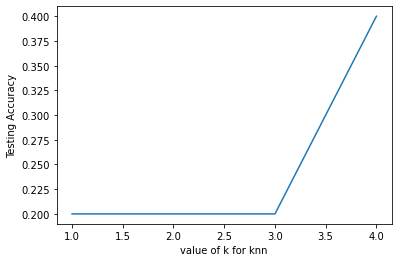

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(krange,score_list)
plt.xlabel("value of k for knn")
plt.ylabel("Testing Accuracy")
